In [4]:
n_runs = 250000     # number of total monte carlo samples needed
n_chains = 4       # number of MCMC chains
n_burnin = 10000    # number of runs taken as burnin
t_burnin = 17700    # time taken for burnin on average
t_days = (n_runs/(n_chains*n_burnin) + 1)*t_burnin/(3600*24)
print(t_days,"days to get posterior")

t_run = 17700/(8*n_burnin)
t_observables = t_run*n_runs
print(t_observables/3600,"hours to compute all observables for Posterior")

t_hf = 160  # time in seconds for high fidelity of 10 nuclei
n_runs_hf = 500
t_days_hf = t_hf*n_runs_hf/(3600*24)
print(f"{n_runs_hf} high fidelity runs to error check would take {t_days_hf} days")


1.4852430555555556 days to get posterior
15.364583333333334 hours to compute all observables for Posterior
500 high fidelity runs to error check would take 0.9259259259259259 days


69021


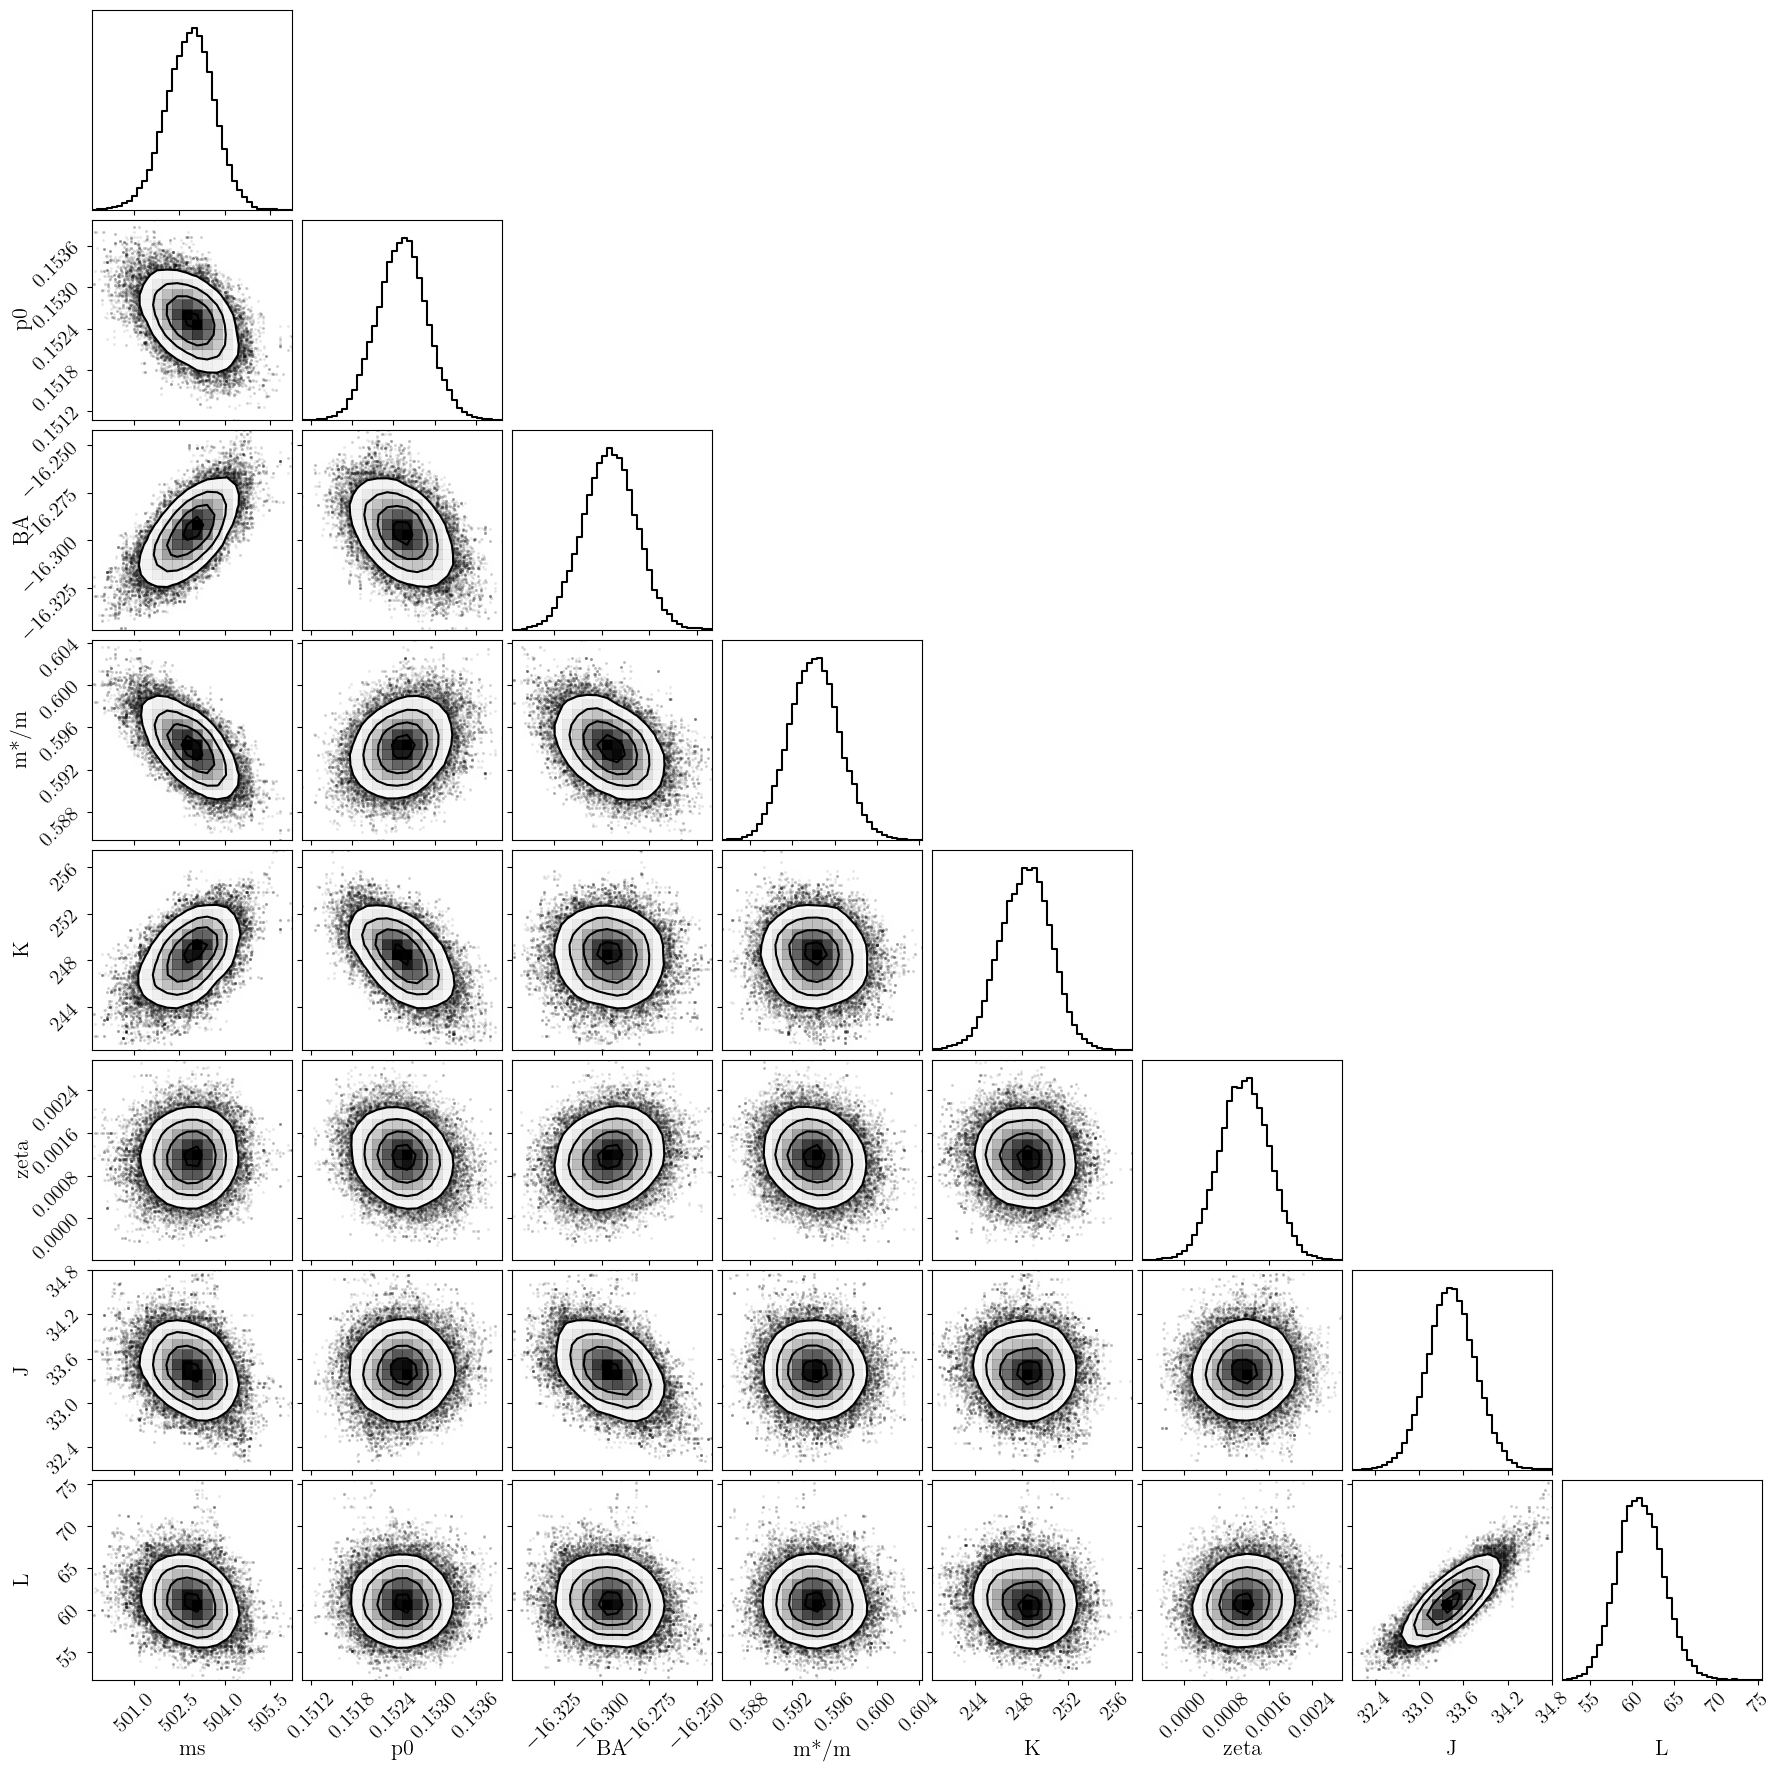

In [94]:
import corner
import numpy as np
import matplotlib.pyplot as plt
samples = np.loadtxt("MCMC.txt")

new_samples = np.zeros_like(samples)
for i in range(len(samples)):
    new_samples[i,0] = samples[i,7]
    new_samples[i,1] = samples[i,1]
    new_samples[i,2] = samples[i,0]
    new_samples[i,3] = samples[i,2]
    new_samples[i,4] = samples[i,3]
    new_samples[i,5] = samples[i,6]
    new_samples[i,6] = samples[i,4]
    new_samples[i,7] = samples[i,5]
new_samples = np.array(new_samples)

c_samples = []
i=0
while (i < len(new_samples)):
    c_samples.append(new_samples[i,:])
    i += 1
c_samples = np.array(c_samples)
print(len(c_samples))

#ranges = [(480,504),(0.146,0.155),(-16.4,-16.14),(0.58,0.62),(200,260),(0,0.06),(30,42),(50,210)]
figure = corner.corner(c_samples,labels=["ms","p0","BA","m*/m","K","zeta","J","L"],hist_bin_factor=[2.0]*8,smooth=0.7,smooth1d=0.6,bins=[20]*8) #,range=ranges)
plt.savefig("Corner.png",transparent=False,facecolor='white')

In [414]:
import statistics
posterior = np.loadtxt("Posterior_noskin.txt")
for i in range(30):
    print(f"{statistics.mean(posterior[:,i])}  {statistics.stdev(posterior[:,i])}  {min(posterior[:,i])}  {max(posterior[:,i])}")


-16.27550113678805  0.02784515742767239  -16.391100102714645  -16.168608228585374
0.15004790714657257  0.001020023502289923  0.14593929844599865  0.1537897075413452
0.598661002256021  0.004613568897562519  0.5807990255491507  0.618956043045692
230.77327244908972  6.632507668481943  208.84206550321602  252.31784602178703
37.94451864647914  1.3551409764710427  32.828550634668616  43.32235317129384
123.55145494700821  22.88699558405694  59.026693631337935  220.2650347286009
0.028198928263439435  0.006189889092789684  0.004529034927876129  0.0517284887047211
493.6076641346023  2.8046237523037685  483.38778029172755  501.4466414656431
-7.996789880165945  0.00940458436732032  -8.035032784968166  -7.952113629996575
2.727855241973961  0.004369539560371259  2.7108336035004754  2.748467696452076
-8.550777517810992  0.007867663788861673  -8.585671664449933  -8.518531770843992
3.4633478590243523  0.003402483319675037  3.4448976331806995  3.4776622976429614
-8.629454336382596  0.006234483641531821 

In [95]:
import numpy as np
import matplotlib.pyplot as plt

posterior = np.loadtxt("Posterior_noskin.txt")

# Generate random data for demonstration
np.random.seed(0)
data = posterior[:,8:30]

# Create subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot histograms
for i in range(5):
    for j in range(5):
        if ((i*5 + j) > 21):
            axs.axis('off')
        else:
            axs[i, j].hist(data[:, i * 5 + j], bins=20)
            axs[i, j].set_title(f'Histogram {i*5 + j + 1}')
        print(i*5 +j,i,j)

# Plot remaining two histograms in the last row
for k in range(2):
    axs[4, k].hist(data[:, 20 + k], bins=20)
    axs[4, k].set_title(f'Histogram {20 + k + 1}')

# Hide empty subplots
for ax in axs.flat:
    if not ax.get_title():
        ax.axis('off')

plt.tight_layout()
plt.show()

FileNotFoundError: Posterior_noskin.txt not found.

In [1]:
import statistics
import numpy as np

data = np.loadtxt("MCMC.txt")
for i in range(8):
    print(statistics.mean(data[:,i]))

-16.295749597919524
0.15252792717999006
0.5941221178276139
248.35408401983025
33.443308997372824
61.030491815615605
0.0011395521340312738
502.84995121484616


In [2]:
import statistics
import numpy as np
import math

MCMC_samples = np.loadtxt("MCMC_noskin.txt")

for i in range(0,8):
   print(statistics.mean(MCMC_samples[:,i]))

cov = np.cov(MCMC_samples,rowvar=False)
invcov = np.linalg.inv(cov)
print(invcov)

-16.27550113678805
0.15004790714657257
0.598661002256021
230.77327244908972
37.94451864647914
123.55145494700821
0.028198928263439435
493.6076641346023
[[ 1.45087597e+04  2.66911177e+05  1.92762215e+04  9.73333593e+01
   2.68305315e+02 -1.42614901e+01 -2.00592571e+04 -2.05056897e+02]
 [ 2.66911177e+05  9.21759758e+06  2.14979107e+05  2.31402971e+03
   4.06176813e+03 -1.89416853e+02  2.93750541e+05 -3.55050531e+03]
 [ 1.92762215e+04  2.14979107e+05  9.66016365e+04  8.27772186e+01
   6.63029063e+02 -4.12859633e+01 -3.63918283e+04 -2.04323827e+02]
 [ 9.73333593e+01  2.31402971e+03  8.27772186e+01  9.61931186e-01
   9.89590823e-01 -5.43461963e-02 -9.56537939e+01 -1.97246964e+00]
 [ 2.68305315e+02  4.06176813e+03  6.63029063e+02  9.89590823e-01
   1.64430634e+01 -9.15098588e-01 -3.58733596e+02 -1.65130725e+00]
 [-1.42614901e+01 -1.89416853e+02 -4.12859633e+01 -5.43461963e-02
  -9.15098588e-01  5.36578113e-02  2.39221594e+01  1.01710472e-01]
 [-2.00592571e+04  2.93750541e+05 -3.63918283e+04 

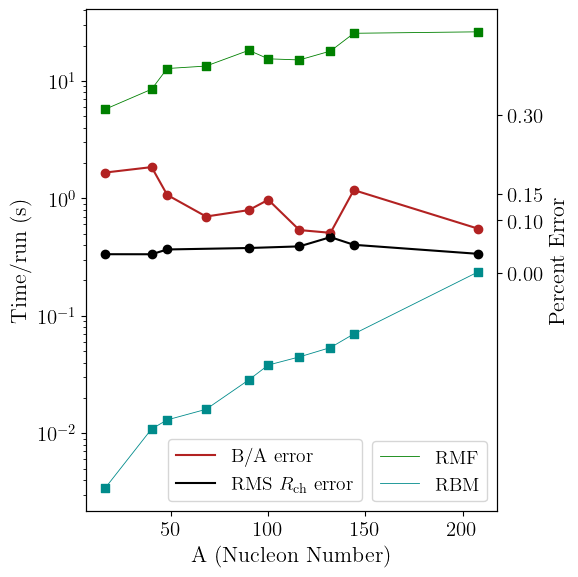

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to a more professional style
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 14,
    'text.latex.preamble': r'\usepackage{bm}',
})

fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()

A = [16,40,48,68,90,100,116,132,144,208]
A_ch = [16,40,48,90,116,132,144,208]
hf_time = [5.73,8.50,12.75,13.38,18.22,15.42,15.09,17.96,25.44,26.18]
rbm_time = [0.0034,0.0109,0.0130,0.0160,0.0285,0.0381,0.0447,0.0537,0.0701,0.237]

                                      
                                        
BA_error = [0.015204,0.0171746,0.0128563,0.00932071,0.0104125,0.0114725,0.00696629,0.00640033,0.0130645,0.00663517]
Rch_error = [0.000974,0.00125273,0.00156794,0.00204174,0.00235614,0.00322082,0.00266733,0.00202209]
BA_exp = [7.98,8.55,8.67,8.68,8.71,8.25,8.52,8.36,8.30,7.87]
Rch_exp = [2.70,3.48,3.48,4.27,4.63,4.71,4.95,5.50]

ax1.plot(A,hf_time,lw=0.6,color='green')
ax1.plot(A,rbm_time,lw=0.6,color='darkcyan')
ax1.scatter(A,hf_time,marker="s",color='green')
ax1.scatter(A,rbm_time,marker="s",color='darkcyan')
ax1.semilogy()

ax2.plot(A,np.divide(BA_error,BA_exp)*100,color='firebrick')
ax2.plot(A_ch,np.divide(Rch_error,Rch_exp)*100,color='black')
ax2.scatter(A,np.divide(BA_error,BA_exp)*100,color='firebrick')
ax2.scatter(A_ch,np.divide(Rch_error,Rch_exp)*100,color='black')

ax1.set_ylabel("Time/run (s)")
ax2.set_ylabel("Percent Error")
ax1.set_xlabel("A (Nucleon Number)")
ax1.legend(["RMF","RBM"],loc='lower right')
ax2.legend(["B/A error",r"RMS $R_{\rm ch}$ error"],loc=[.2,.02])
ax2.set_ylim(-0.45,0.5)
ax2.set_yticks([0.0,0.1,0.15,0.3])

plt.tight_layout()
plt.savefig('LLNL RBM')


In [120]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/msals97/Desktop/RBM/RBM')
import functions as func

# Set font to a more professional style
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 14,
    'text.latex.preamble': r'\usepackage{bm}',
})

nucleus = 9

# Jacobian computation
jac = True
##################################################################

# Specify the number of proton and neutron states
nstates_n_list = [3,6,7,10,11,11,14,16,16,22]
nstates_p_list = [3,6,6,7, 10,11,11,11,13,16]
nstates_n = nstates_n_list[nucleus]
nstates_p = nstates_p_list[nucleus]

# Specify the number of protons and neutrons (for file specification purposes)
A_list = [16,40,48,68,90,100,116,132,144,208]
Z_list = [8, 20,20,28,40,50, 50, 50, 62, 82]
A = A_list[nucleus]
Z = Z_list[nucleus]
##################################################################

# File specifications
##################################################################
# Set the directory
dir = f"{A},{Z}/{A},{Z},Data"

# Specify common grid
r_vec = func.load_data(dir + "/rvec.txt")[1:]

# Import basis numbers
num_basis_states_f, num_basis_states_g, num_basis_states_c, num_basis_states_d, num_basis_meson = func.import_basis_numbers(A,Z)
num_basis_states_s = num_basis_meson[0]
num_basis_states_v = num_basis_meson[1]
num_basis_states_b = num_basis_meson[2]
num_basis_states_a = num_basis_meson[3]

# Import state information (j, alpha, fill_frac)
n_labels, state_file_n = func.load_spectrum( dir + "/neutron_spectrum.txt")
p_labels, state_file_p = func.load_spectrum(dir + "/proton_spectrum.txt")
state_info_n = state_file_n[:,[3,4,5]]
state_info_p = state_file_p[:,[3,4,5]]

# Specify the wave function files for the f_wave neutrons and import
file_pattern = dir + "/neutron/f_wave/state{}.txt"
f_files = [file_pattern.format(n_labels[i]) for i in range(nstates_n)]
f_fields = [func.load_data(f_file) for f_file in f_files]

# Conversion factors
r0_fm = 1.25
#################################################################

# Proper Orthogonal Decomposition
#################################################################

# perform SVD and construct basis
f_basis = [func.perform_pod(f_fields[i][1:,:], num_basis_states_f[i]) for i in range(nstates_n)]
f_basis = [f_basis[i]*np.mean(f_fields[i][10,:])/f_basis[i][10,0] for i in range(nstates_n)]

fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.plot(r_vec,f_fields[0][1:,0],lw=1.5,color='black')
ax1.plot(r_vec,f_basis[0][:,[0,1,2]],lw=1.5,ls='dashed')
ax1.plot(r_vec,f_fields[0][1:,1:],lw=1.5,color='black')


ax1.set_ylabel(r"Ground State $^{208} \rm{Pb}$")
ax1.set_xlabel("r (unitless)")
ax1.legend(["50 RMF solutions","1st basis state","2nd basis state","3rd basis state"],loc='lower right')

plt.tight_layout()
plt.savefig('LLNL basis')